# ch 6. multiple linear regression 

## 다중 선형 회귀
독립 변수의 개수가 2개 이상인 선형 회귀 모델을 다중 선형 회귀라고 부릅니다. 다중 선형 회귀 모형은 아래와 같습니다.

$$Y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\beta_{k}X_{k}+\epsilon$$

$$X_{j}:\text{j 번째 독립 변수}$$
$$Y:\text{종속 변수}$$
$$\beta_{0}:\text{절편}$$
$$\beta_{j}:\text{j번째 기울기}$$
$$\epsilon:\text{오차}$$

우리가 하고 싶은 것은 데이터로부터 회귀 식을 추정하는 것입니다. 추정된 회귀 식은 아래와 같습니다.

$$\hat{y_{i}}=b_{0}+b_{1}x_{1i}+b_{2}x_{2i}+...+b_{k}x_{ki}$$

## 최소 제곱법

다중 선형 회귀도 단순 선형 회귀와 마찬가지로 최소 제곱법으로 회귀식을 도출할 수 있습니다.

$$(b_{0},b_{1}, ..., b_{k})=argmin\sum_{i=1}^{n}\epsilon_{i}^2=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_{1i}- ... -\beta_{k}x_{ki})^2$$

이렇게 도출한 회귀 계수 b_j는 나머지 독립 변수들을 모두 고정한 채, j 번째 독립변수를 1단위 변화할 때 종속 변수의 변화량이라고 해석할 수 있습니다.

다중 선형 회귀의 최소 제곱 추정은 maximum likelihood estimation, ordinary least square 등의 방법으로 계산할 수 있습니다. 각각에 대해 궁금하신 분들은 아래 링크를 참고해주세요.

- MLE: https://laoonlee.tistory.com/15
- OLS: https://laoonlee.tistory.com/14

## 변수 선택

회귀식에 포함될 독립 변수를 고르는 것을 변수 선택이라고 합니다. 

### 전진선택법

forward selection method라고도 부릅니다. 더 이상 유의한 추가 변수가 없을 때까지 변수를 하나씩 더해가는 방법입니다. 먼저 k개의 독립변수마다 각각 단순 회귀 모형을 만듭니다. 여기서 SSR이 크거나, SSE가 작거나, F 값이 크거나, t 값이 크거나 R^2 값이 큰 것을 기준으로 적합이 제일 잘 된 것을 선택합니다. 

### 후진 제거법

backward elimination method라고도 부릅니다. 먼저 k개의 독립변수들을 모두 포함하는 모델을 만듭니다. 이 중 가장 유의하지 않은 독립변수를 제거하는 과정을 반복합니다. 모든 회귀 계수가 유의할 때까지 반복합니다.

### 단계적 선택법

stepwise selection method라고도 부릅니다. 전진 선택과 후진 제거를 적절히 섞어서 변수를 찾습니다.

## 집 값 예측하기 예제

집 값 예측 모델을 다중 선형회귀를 사용해서 학습해보겠습니다. 전진 선택법을 사용하여 다중 공선성 발생 여부를 체크하면서 price와 선형 관계성이 높은 독립 변수들을 추가해보겠습니다.

### 데이터 셋 확인

In [19]:
from utils import load_house_dataset

x_train, x_test, y_train, y_test = load_house_dataset()

### 독립 변수 선택

히트맵을 그린 뒤, price와 관련성이 높은 독립 변수를 하나 선택하겠습니다.

In [4]:
x_train["price"] = y_train

<Axes: >

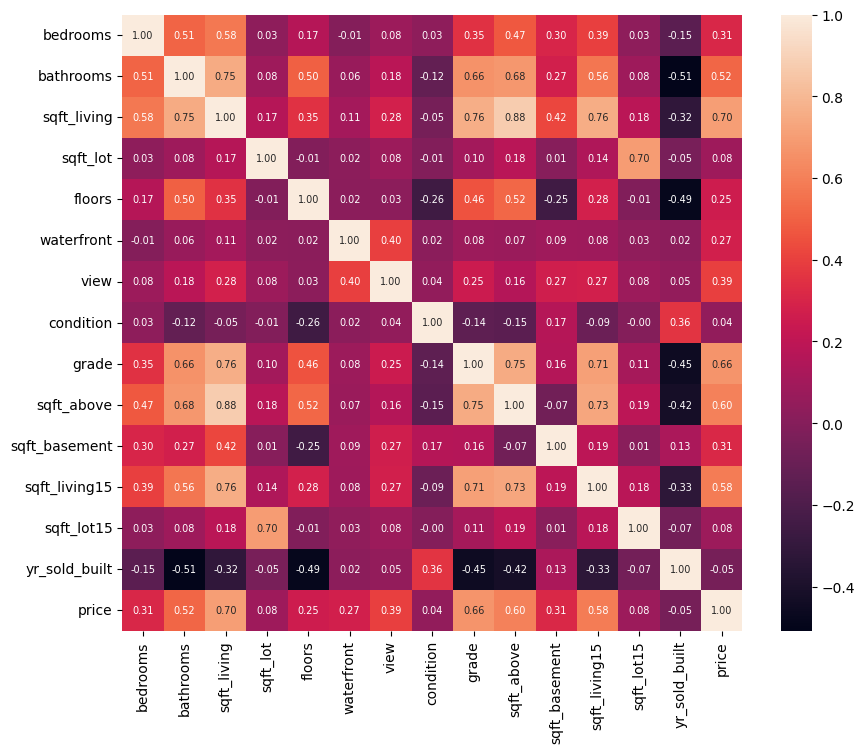

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    x_train.corr(),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7}
)

### 단순 선형회귀 모델 학습

독립 변수 하나만 선택하여 선형 회귀 모델을 학습시켜 보겠습니다.

In [13]:
import statsmodels.api as sm

def train_multiple_linear_regression(X, y):
    X_constant = sm.add_constant(X, has_constant="add")
    model = sm.OLS(y, X_constant)
    results = model.fit()
    return results

### 전진 선택법으로 다중 선형 회귀 모델 학습

price와 연관 관계가 높은 독립변수를 추가해가며 모델을 학습시켜 보겠습니다.

In [24]:
x_cur_train = x_train[["sqft_living", "grade", "yr_sold_built"]]
results = train_multiple_linear_regression(x_cur_train, y_train)

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     8726.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:47:54   Log-Likelihood:            -2.3774e+05
No. Observations:               17280   AIC:                         4.755e+05
Df Residuals:                   17276   BIC:                         4.755e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.084e+06   1.62e+04    -66.734      0.000   -1.12e+06   -1.05e+06
sqft_living     178.3349      2.948     60.497      0.000     172.557     184.113
grade          1.429e+05   2429.519     58.818      0.000    1.38e+05    1.48e+05
yr_sold_built  3679.4983     66.355     55.451      0.000    3549.435    3809.562
==============================================================================
Omnibus:                    13941.599   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           992801.514
Skew:                           3.382   Prob(JB):                         0.00
Kurtosis:                      39.512   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

모든 회귀 계수들이 유의하고, R square 값이 0.490에서 0.532로 대폭 증가한 것을 확인할 수 있습니다. 한번 더 독립 변수를 추가해보겠습니다.

이번에도 모든 회귀 계수들이 유의하며, R square 값이 0.532에서 0.57로 증가했습니다. 이처럼 단순 선형 회귀 모델에서 독립 변수를 추가해가면서 다중 선형 회귀 모델을 학습시키는 기법이 전진 선택법입니다.

### 후진 제거법으로 다중 선형 회귀 모델 학습

독립 변수를 모두 사용하여 다중 선형 회귀 모델을 학습시킨 뒤, 유의하지 않은 독립 변수들을 제거하는 후진 제거법으로 다중 선형 회귀 모델을 학습시켜 보겠습니다.

In [28]:
results = train_multiple_linear_regression(x_train, y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2518.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:03:13   Log-Likelihood:            -2.3652e+05
No. Observations:               17280   AIC:                         4.731e+05
Df Residuals:                   17266   BIC:                         4.732e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.976e+05   1.91e+04    -52.247      0.000   -1.04e+06    -9.6e+05
bedrooms      -3.738e+04   2218.277    -16.849      0.000   -4.17e+04    -3.3e+04
bathrooms      4.252e+04   3798.586     11.193      0.000    3.51e+04       5e+04
sqft_living     109.9395      2.706     40.622      0.000     104.635     115.244
sqft_lot         -0.0203      0.053     -0.380      0.704      -0.125       0.084
floors         2.927e+04   4167.182      7.025      0.000    2.11e+04    3.74e+04
waterfront     5.997e+05   2.07e+04     29.009      0.000    5.59e+05     6.4e+05
view           4.383e+04   2500.025     17.530      0.000    3.89e+04    4.87e+04
condition      1.737e+04   2713.538      6.402      0.000    1.21e+04    2.27e+04
grade          1.198e+05   2481.083     48.301      0.000    1.15e+05    1.25e+05
sqft_above       52.1945      2.594     20.119      0.000      47.109      57.279
sqft_basement    57.7450      3.078     18.761      0.000      51.712      63.778
sqft_living15    24.7844      3.977      6.232      0.000      16.989      32.580
sqft_lot15       -0.5603      0.082     -6.792      0.000      -0.722      -0.399
yr_sold_built  3659.3475     74.433     49.163      0.000    3513.451    3805.244
==============================================================================
Omnibus:                    12645.541   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           825847.293
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                      36.363   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

유의하지 않았던 sqft_lot 독립 변수를 제거한 뒤에 다시 학습을 시켜보면 모든 독립변수가 유의하다고 나옵니다. 그리고 독립 변수를 줄였음에도 R square 값이 동일하게 유지되는 것을 확인할 수 있습니다.

In [30]:
x_cur_train = x_train.drop(["sqft_lot"], axis=1)
results = train_multiple_linear_regression(x_cur_train, y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2728.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:13:26   Log-Likelihood:            -2.3652e+05
No. Observations:               17280   AIC:                         4.731e+05
Df Residuals:                   17267   BIC:                         4.732e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.978e+05   1.91e+04    -52.264      0.000   -1.04e+06    -9.6e+05
bedrooms      -3.736e+04   2217.677    -16.845      0.000   -4.17e+04    -3.3e+04
bathrooms       4.25e+04   3798.287     11.190      0.000    3.51e+04    4.99e+04
sqft_living     109.8989      2.704     40.639      0.000     104.598     115.200
floors         2.933e+04   4164.433      7.043      0.000    2.12e+04    3.75e+04
waterfront     5.999e+05   2.07e+04     29.022      0.000    5.59e+05     6.4e+05
view           4.379e+04   2498.333     17.528      0.000    3.89e+04    4.87e+04
condition      1.738e+04   2713.330      6.406      0.000    1.21e+04    2.27e+04
grade          1.198e+05   2480.968     48.305      0.000    1.15e+05    1.25e+05
sqft_above       52.1215      2.587     20.147      0.000      47.051      57.192
sqft_basement    57.7775      3.077     18.779      0.000      51.747      63.808
sqft_living15    24.8461      3.974      6.253      0.000      17.057      32.635
sqft_lot15       -0.5817      0.060     -9.630      0.000      -0.700      -0.463
yr_sold_built  3658.9607     74.424     49.164      0.000    3513.082    3804.840
==============================================================================
Omnibus:                    12648.482   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           826683.036
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      36.380   Cond. No.                     6.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 다중 공선성

다중 선형 회귀 모델은 다중 공선성이 발생했는지 여부를 진단해야합니다. 다중 공선성(multi colinearity)이란 독립 변수들 사이에 선형 독립성이 확보되지 못한 상태를 말합니다. 이는 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우를 말합니다. 예를들어 주중 매출, 주말 매출, 주간 매출 컬럼이 있다면, 주간 매출은 주중 매출과 주말 매출의 합으로 표현될 수 있습니다.

### 다중 공선성이 발생시키는 문제
1. 파라미터 추정의 불안정성: 독립 변수들이 서로 설명력을 공유하게 되어 파라미터 추정이 불안정해집니다. 작은 변화가 모델의 파라미터에 큰 영향을 미치므로 추정된 파라미터의 신뢰도가 낮아집니다.

2. 해석의 어려움: 다중 공선성으로 인해 독립 변수들의 개별적인 영향력을 파악하기 어려워집니다.

3. 과도한 가중치 크기: 다중 공선성으로 인해 모델은 적절한 가중치를 찾지 못하고 변수들에 대해 과도한 가중치 크기를 할당하는 경향이 있습니다. 이로 인해 모델의 일반화 능력이 저하될 수 있습니다.

다중 공선성 문제가 발생하면 다중 선형 회귀 모델 자체가 제대로 학습되지 않기 때문에 제거해주어야 합니다. 직접 한번 뚜렷한 선형 관계가 있는 독립변수들을 사용하여 다중 선형 회귀 모델을 학습시키고, 다중 공선성 문제를 진단해보겠습니다.

### VIF를 이용한 다중 공선성 진단
 
다중 공선성을 제거하는 가장 기본적인 방법은 다른 독립 변수에 의존하는 변수를 없애는 것입니다. 이는 VIF 값을 계산하여 구할 수 있습니다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것입니다. 𝑖번째 변수의 VIF는 다음과 같이 계산합니다.

$$\text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2}$$

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by="VIF", ascending=False)

In [32]:
check_multi_colinearity(x_cur_train)

/Users/user/miniconda3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,sqft_living,inf
8,sqft_above,inf
9,sqft_basement,inf
7,grade,68.514051
1,bathrooms,27.660818
6,condition,27.502721
10,sqft_living15,26.518911
0,bedrooms,20.942549
3,floors,16.026438
12,yr_sold_built,5.137268


VIF 값이 10이 넘어가면 해당 독립 변수가 다른 독립 변수에 의존한다고 봅니다. 이 경우, 서로 상관 관계가 높은 컬럼 중 가장 설명력이 높은 컬럼만 남기고 나머지 컬럼을 제거합니다.

In [45]:
x_cur_train = x_cur_train.drop(["sqft_basement"], axis=1)

In [46]:
check_multi_colinearity(x_cur_train)

,Features,VIF
0,sqft_living,6.916018
1,floors,6.195261
5,yr_sold_built,1.978438
3,view,1.397002
4,sqft_lot15,1.258011
2,waterfront,1.197247


In [47]:
results = train_multiple_linear_regression(x_cur_train, y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     4035.
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:41:42   Log-Likelihood:            -2.3814e+05
No. Observations:               17280   AIC:                         4.763e+05
Df Residuals:                   17273   BIC:                         4.763e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.581e+05   8699.591    -29.671      0.000   -2.75e+05   -2.41e+05
sqft_living     272.7085      2.271    120.066      0.000     268.257     277.161
floors         7.312e+04   3908.313     18.708      0.000    6.55e+04    8.08e+04
waterfront     5.727e+05   2.26e+04     25.315      0.000    5.28e+05    6.17e+05
view           6.737e+04   2655.788     25.368      0.000    6.22e+04    7.26e+04
sqft_lot15       -0.6021      0.065     -9.208      0.000      -0.730      -0.474
yr_sold_built  2548.0973     71.385     35.695      0.000    2408.175    2688.019
==============================================================================
Omnibus:                    10397.818   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           355828.717
Skew:                           2.335   Prob(JB):                         0.00
Kurtosis:                      24.735   Cond. No.                     3.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다중 공선성을 제거할 경우, R square 값이 떨어질 수 있습니다. 모델의 안정성과 해석 가능성을 우선으로 여기는 경우에는 다중 공선성을 제거하는 것이 바람직할 수 있습니다. 하지만 모델의 설명력(R-squared)을 최대화하는 데에 집중해야 하는 경우에는 다중 공선성을 제거하더라도 R-squared 값이 떨어질 수 있으며, 이런 경우에는 다른 평가 지표를 함께 고려하여 적절한 모델 선택을 해야 합니다.

### 그 외 다중 공선성 해결 방법

다중 공선성 문제는 크게 3가지 해결 방법이 있습니다.

1. 가장 설명력이 높은 변수를 제외하고 나머지 제거하기
2. 주성분 분석 등 차원 축소 기법을 사용하여 각 컬럼들로 부터 주요 정보만 추출하기
3. lasso, ridge 등 모델 학습 단계에서 가중치 조절하여 다중 공선성 효과 상쇄하기

## 다중 선형 회귀 모델을 선택하는 상황

독립 변수를 추가하거나 제거하면서 딜레마에 빠집니다. 어느 변수를 추가하면 다중 공선성은 발생하지만 R square가 증가하고, 어떤 변수를 전처리하였더니 오히려 R square가 감소하는 모습을 보입니다. 이처럼 다중 선형회귀 모델은 어떤 모델이 좋은 모델인지 기준을 명확히 내리는 것이 어렵습니다. 

만일 kaggle 경진대회 처럼 예측력 자체가 중요한 상황이라면 Decision Tree Regressor와 같은 모델을 선택하는 것이 더 좋습니다. 이 때, 평가 metric에 맞춰서 최대한 많은 독립변수와 파생변수를 생성하여 예측력이 뛰어난 모델을 만드는 것이 좋습니다.

반대로 특정 독립변수가 한 단위 증가했을 때, 종속 변수가 얼만큼 영향을 받는지 등을 해석하는게 중요한 상황이라면, 다중 선형 회귀 모델을 선택하는 것이 좋습니다. 이는 예측력은 다소 떨어지지만, 독립변수와 종속 변수 간의 관계를 파악하기에 도움을 줍니다.

## 정리

이번 챕터에서는 다중 선형 회귀 모델에 대해서 배워봤습니다. 단순 선형 회귀를 여러개의 독립 변수에 대해서 확장한 개념이라 크게 어렵지 않았습니다. 다만, 이 때 독립 변수들끼리 선형 상관관계를 맺는 다중 공선성 문제가 등장한 다는 것을 반드시 기억하시기 바랍니다. 다중 공선성은 데이터 분석 직군에서 단골 면접 질문으로 등장하는 만큼, 개념과 진단 방법, 해결 방법을 잘 복습하시기 바랍니다.